# Ejercicio 3: Clasificación de videojuegos por popularidad
---

## Utilización del dataset vgchartz-2024.csv
---

In [2]:
import pandas as pd

# Lectura del dataset
videogames = pd.read_csv("vgchartz-2024.csv")

# Imprimir primera fila del dataset
print("Primera fila del dataset:")
print(videogames.head())

# Imprimir nombres de columnas
print("Nombre de columnas:")
print(videogames.columns)

Primera fila del dataset:
                                             img                        title  \
0  /games/boxart/full_6510540AmericaFrontccc.jpg           Grand Theft Auto V   
1  /games/boxart/full_5563178AmericaFrontccc.jpg           Grand Theft Auto V   
2                    /games/boxart/827563ccc.jpg  Grand Theft Auto: Vice City   
3  /games/boxart/full_9218923AmericaFrontccc.jpg           Grand Theft Auto V   
4  /games/boxart/full_4990510AmericaFrontccc.jpg    Call of Duty: Black Ops 3   

  console    genre       publisher       developer  critic_score  total_sales  \
0     PS3   Action  Rockstar Games  Rockstar North           9.4        20.32   
1     PS4   Action  Rockstar Games  Rockstar North           9.7        19.39   
2     PS2   Action  Rockstar Games  Rockstar North           9.6        16.15   
3    X360   Action  Rockstar Games  Rockstar North           NaN        15.86   
4     PS4  Shooter      Activision        Treyarch           8.1        15.09   



---

## Limpieza de datos

---


In [3]:
# Eliminar duplicados y filas con datos faltantes en las columnas clave
videogames = videogames.drop_duplicates()
videogames = videogames.dropna(subset=['total_sales', 'critic_score', 'genre'])

# Convertir total_sales a millones (si no lo está)
videogames['total_sales'] = videogames['total_sales'] * 1e6

# Crear la variable objetivo (categoría de popularidad)
def categorize_popularity(row):
    if row['total_sales'] > 5e6 and row['critic_score'] >= 8.0:
        return 'muy popular'
    elif row['total_sales'] > 2e6 and row['critic_score'] >= 6.5:
        return 'moderadamente popular'
    else:
        return 'menos popular'

videogames['popularity'] = videogames.apply(categorize_popularity, axis=1)

---


## Analisis de variables más importantes para la clasificación

---

In [4]:
from sklearn.preprocessing import MinMaxScaler

# Seleccionar solo las columnas numéricas
numerical_columns = videogames.select_dtypes(include=['float64', 'int64']).columns
X = videogames[numerical_columns]

# Normalizar datos numéricos
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Definir la variable objetivo
y = videogames['popularity']

---

## Aplicación de Random Forest para clasificar y analisis de importancia de características

---

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Aplicar Random Forest
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predicciones
y_pred = clf.predict(X_test)

# Evaluar el modelo
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Importancia de las características
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]

Classification Report:
                       precision    recall  f1-score   support

        menos popular       1.00      1.00      1.00       736
moderadamente popular       0.97      0.97      0.97        70
          muy popular       0.90      0.95      0.93        20

             accuracy                           1.00       826
            macro avg       0.96      0.97      0.97       826
         weighted avg       1.00      1.00      1.00       826

Confusion Matrix:
[[735   1   0]
 [  0  68   2]
 [  0   1  19]]


---

## Presentación de resultados con gráfica y análisis

---

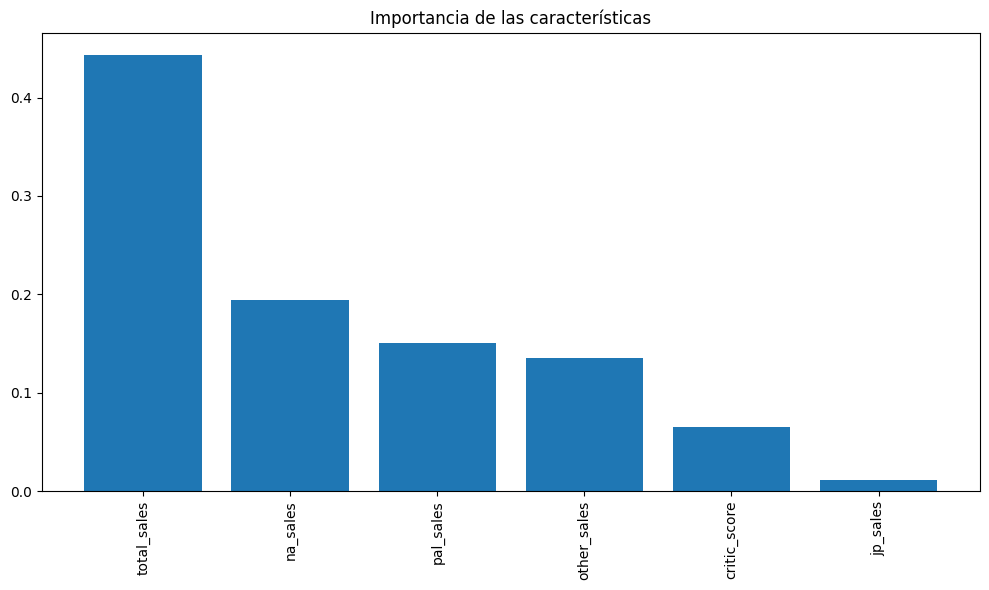

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Gráfico de la importancia de las características
plt.figure(figsize=(10, 6))
plt.title("Importancia de las características")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), numerical_columns[indices], rotation=90)
plt.tight_layout()
plt.show()